In [3]:
# External
import mne
mne.set_log_level("CRITICAL")
import numpy as np

import double_dipper
from double_dipper import dataset, ml, constants
from double_dipper.constants import darkening, tone, problem, strategy_prompt

In [7]:
subjNos = [i for i in range(1,11+1) if i != 5]
pairs = double_dipper.io.filePairs(*[f"cleaned/main/{i}" for i in subjNos])
dset = double_dipper.io.partition(lambda meta: (meta["id"], meta["condition"], meta["epoch"]),
                                  lambda meta: meta["condition"] == "C1",
                                  pairs)

In [8]:
events = [darkening, problem, tone]
events = np.stack([e.occurrence for e in events])
def quickPlot(data, event_id, start, duration):
    data = mne.io.RawArray(data, constants.info)
    %matplotlib notebook
    mne.viz.plot_raw(data, events,
                    highpass=1, lowpass=16,
                    event_color={problem.code: "b",
                                 darkening.code: "k",
                                 strategy_prompt.code: "y",
                                 tone.code: "r"},
                    event_id=event_id,
                    start=start,duration=duration,
                    #order=[1, 2]
    );

## Per-Subject

In [13]:
def testSubject(subjNo):
    event_id = {"tone/no tone": tone.code, "darkening": darkening.code}
    subj_c1 = dataset.subset(lambda k: k[0] == subjNo and k[1] == "C1", dset)
    subj_c2 = dataset.subset(lambda k: k[0] == subjNo and k[1] == "C2", dset)
    c1_avg = dataset.avg_data(subj_c1)
    c2_avg = dataset.avg_data(subj_c2)
    diff = c1_avg - c2_avg
    quickPlot(diff, event_id, tone.delay - 0.5, 2)

Subject 1


<IPython.core.display.Javascript object>


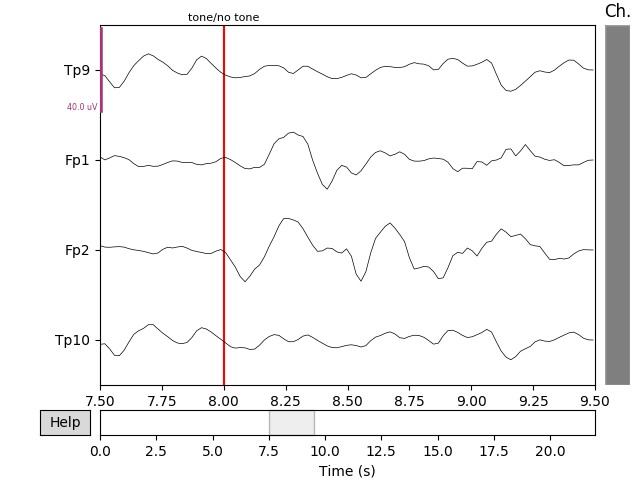

Subject 2


<IPython.core.display.Javascript object>


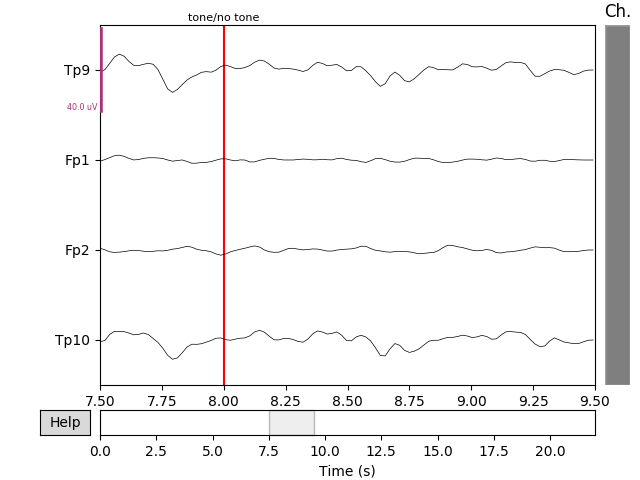

Subject 3


<IPython.core.display.Javascript object>


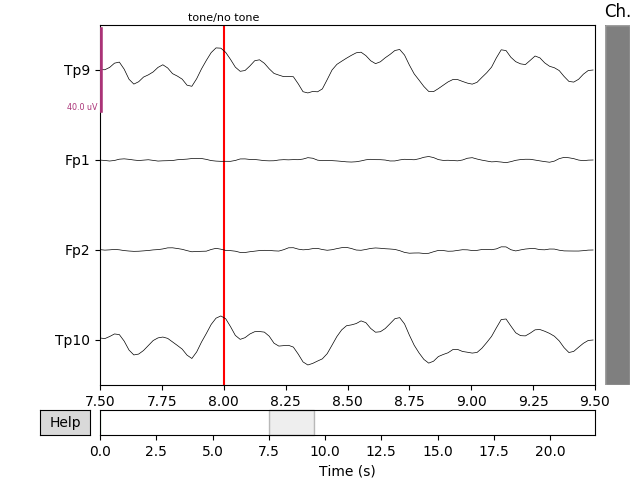

Subject 4


<IPython.core.display.Javascript object>


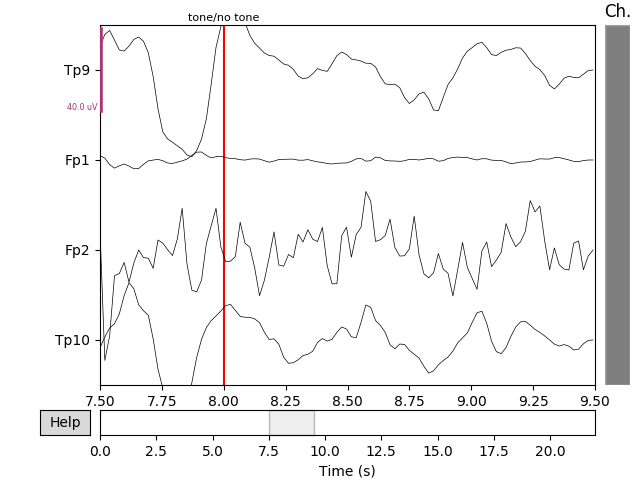

Subject 6


<IPython.core.display.Javascript object>


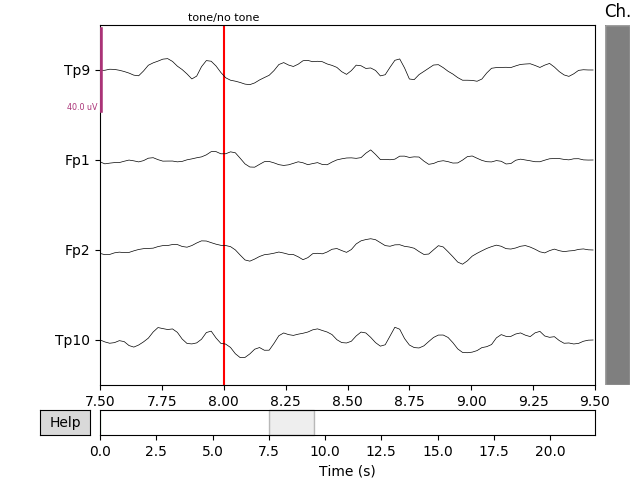

Subject 7


<IPython.core.display.Javascript object>


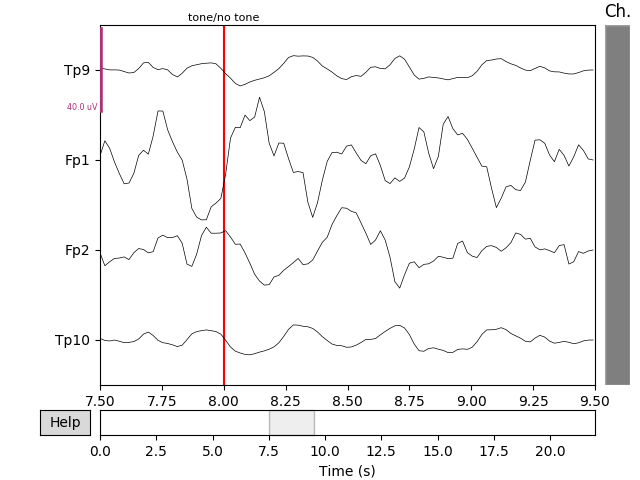

Subject 8


<IPython.core.display.Javascript object>


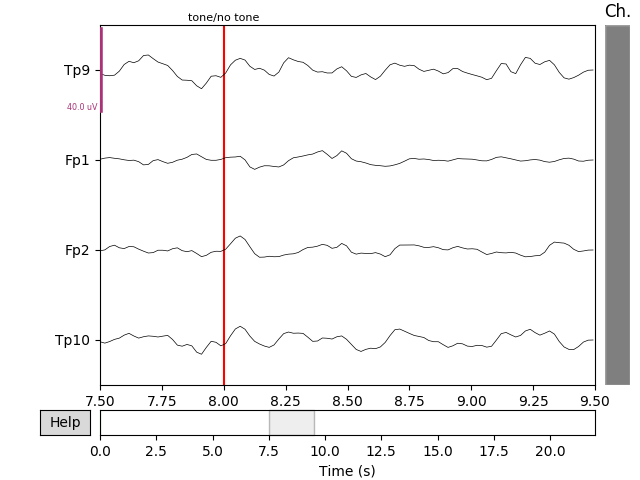

Subject 9


<IPython.core.display.Javascript object>


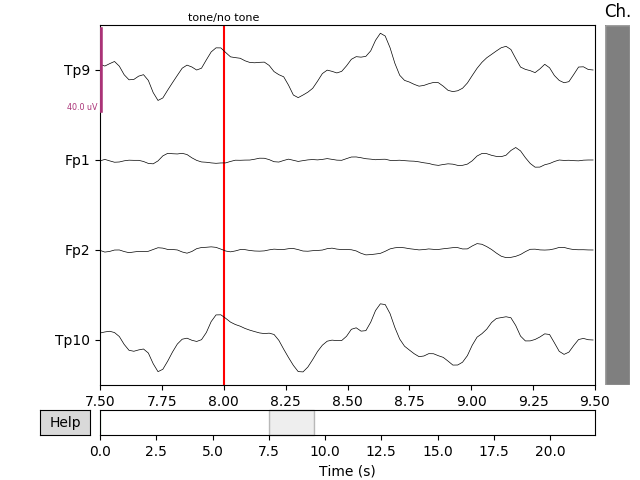

Subject 10


<IPython.core.display.Javascript object>


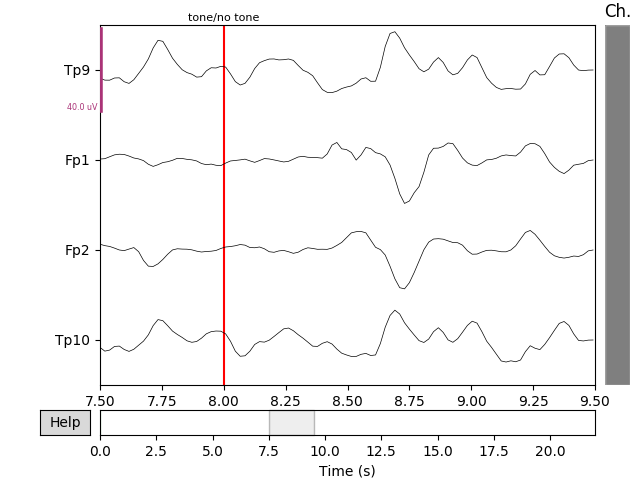

Subject 11


<IPython.core.display.Javascript object>


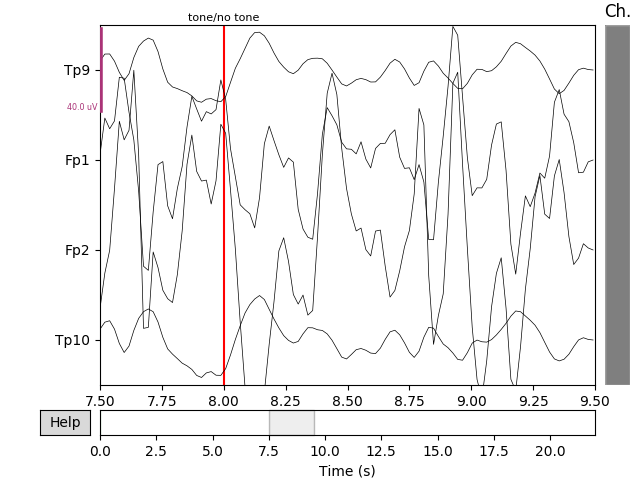

In [14]:
for i in subjNos:
    print(f"Subject {i}")
    testSubject(i)

In [17]:
outliers = {11}

## All Subjects

In [22]:
event_id = {"tone/no tone": tone.code, "darkening": darkening.code}

### Outliers Kept

<IPython.core.display.Javascript object>


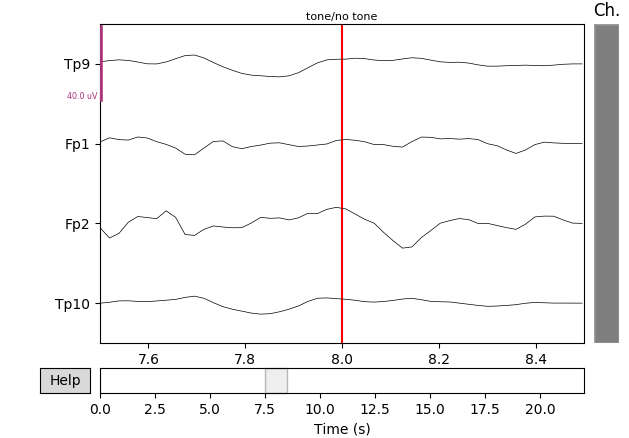

In [24]:
C1s = dataset.subset(lambda k: k[1] == "C1", dset)
C2s = dataset.subset(lambda k: k[1] == "C2", dset)
C1data = dataset.avg_data(C1s)
C2data = dataset.avg_data(C2s)
diff = C1data - C2data
quickPlot(diff, event_id, tone.delay - 0.5, 1)

### Outliers Removed

<IPython.core.display.Javascript object>


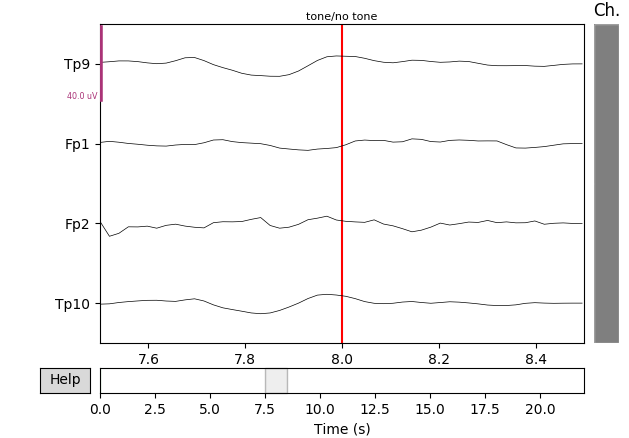

In [23]:
C1s = dataset.subset(lambda k: k[1] == "C1" and k[0] not in outliers, dset)
C2s = dataset.subset(lambda k: k[1] == "C2" and k[0] not in outliers, dset)
C1data = dataset.avg_data(C1s)
C2data = dataset.avg_data(C2s)
diff = C1data - C2data
quickPlot(diff, event_id, tone.delay - 0.5, 1)

## Early Tone

In [9]:
event_id = {"tone/no tone": tone.code, "darkening": darkening.code}

In [27]:
def earlyTone(key):
    if key[1] != "C1": return False
    epoch = key[0]
    width = 5
    if (0 < epoch) and (epoch < width + 1): return True
    midpoint = constants.num_problems // 2
    if (midpoint < epoch) and (epoch < midpoint + width + 1): return True
    return False

<IPython.core.display.Javascript object>


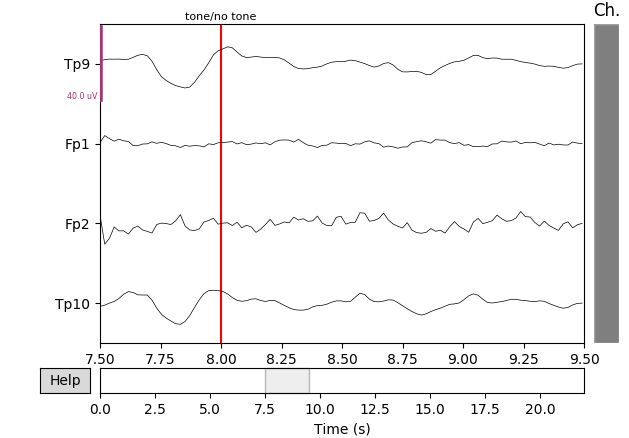

In [28]:
earlySet = dataset.subset(earlyTone, dset)
earlySet = dataset.subset(lambda k: k[0] not in outliers, earlySet)

c2_set = dataset.subset(lambda k: k[1] == "C2" and k[0] not in outliers, dset)
early_data = dataset.avg_data(earlySet)
c2_data = dataset.avg_data(c2_set)
diff = early_data - c2_data
quickPlot(diff, event_id, tone.delay - 0.5, 2)